In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
df = pd.read_csv("mall_customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [2]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

No null values in our dataset

In [3]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

/Users/devpatel917/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/devpatel917/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/devpatel917/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level f

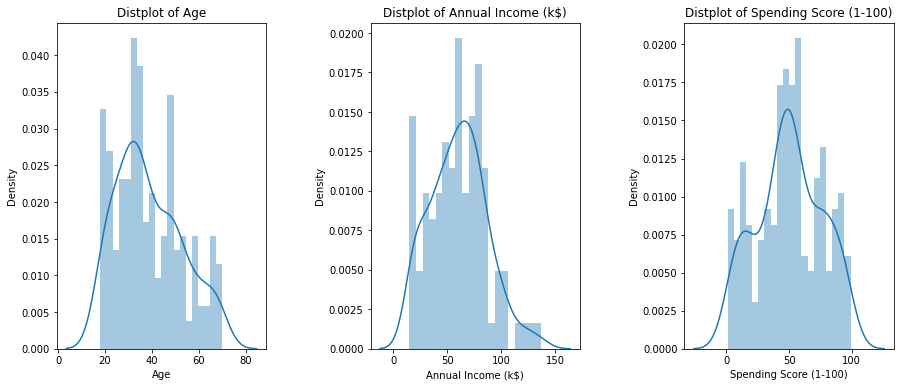

In [4]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

Distribution is quite normal for age, income, and spending

In [5]:
# Drop categorical variables 
df = df.drop(["Gender", "CustomerID"], axis = 1)

Optimal Number of Clusters:  6


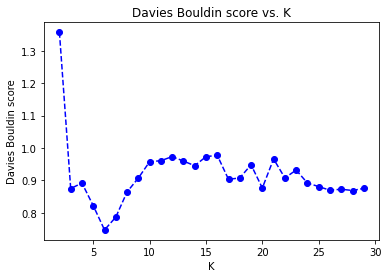

In [6]:
#1. Determine the optimal number of clusters using Davies Bouldin
coordinates = []
for i in range(len(df)):
    coor = df.loc[i, :].values.tolist()
    coordinates.append(coor)

coordinates = np.array(coordinates)

def get_kmeans_score(data, center):
    kmeans = KMeans(n_clusters=center, random_state = 0)
    model = kmeans.fit_predict(coordinates)
    score = davies_bouldin_score(coordinates, model)
    
    return score
scores = []
centers = list(range(2,30))
min_center = 0
min_score = 1
for center in centers:
    score = get_kmeans_score(coordinates, center)
    scores.append(score)
    if score < min_score:
        min_score = score
        min_center = center
    
print("Optimal Number of Clusters: ", min_center)
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. K')
plt.show()

In [7]:
#2. Run k means clustering algorithm
kmeans = KMeans(n_clusters=min_center, random_state=0) 
labels = kmeans.fit_predict(coordinates)
df["K means Cluster"] = labels
df

,Age,Annual Income (k$),Spending Score (1-100),K means Cluster
0,19,15,39,5
1,21,15,81,4
2,20,16,6,5
3,23,16,77,4
4,31,17,40,5
...,...,...,...,...
195,35,120,79,3
196,45,126,28,2
197,32,126,74,3
198,32,137,18,2


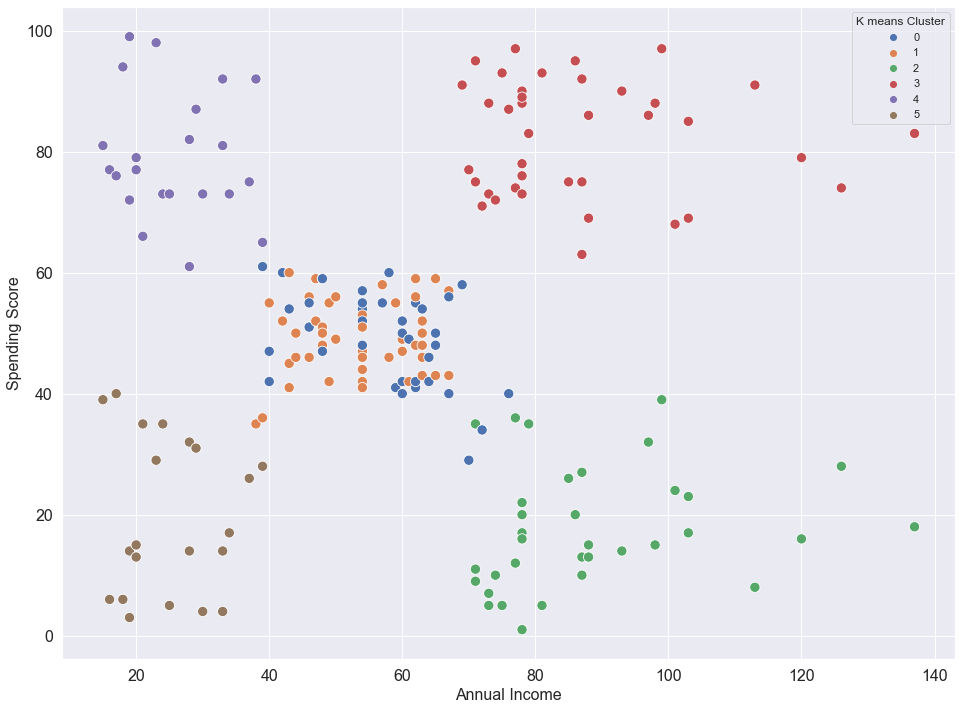

In [8]:
#3. Plot income vs score and clusters
plt.figure(figsize=(16,12))
sns.set_theme()
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)", hue="K means Cluster", s = 105, palette="deep")
plt.xlabel("Annual Income", fontsize = 16)
plt.ylabel("Spending Score", fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()